### Importing libraries

In [89]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.cbook as cbook
import matplotlib.dates as mdates
%matplotlib inline

### As there are many columns, setting the options to show all columns

In [90]:
pd.set_option('display.max_columns', None)

### Reading in the file for 2007_2011, 2016-2018

In [91]:
accepted2007 = pd.read_csv("accepted_2007_2011.csv")

In [92]:
accepted2016 = pd.read_csv("accepted_2016_2018_individual.csv")

In [93]:
accepted2007.set_index("id", inplace=True)

In [94]:
accepted2016.set_index("id", inplace=True)

### Selecting the columns that have low variance and the columns that are relevant for after receiving the loan and not in the loan grading. Splitting the data into pre loan and after loan dataframes

In [95]:
drop_no_var2007 = ["hardship_flag", "disbursement_method", "tax_liens", "delinq_amnt", "chargeoff_within_12_mths", "acc_now_delinq", "application_type", 
"policy_code", "collections_12_mths_ex_med", "out_prncp", "out_prncp_inv", "pub_rec", "desc", "loan_status", "initial_list_status"]

In [96]:
drop_no_var2016 = ["hardship_flag", "chargeoff_within_12_mths", "application_type", "policy_code", "out_prncp",
               "pymnt_plan"]

In [97]:
post_loan_list2007 = ["total_pymnt", "total_pymnt_inv", "total_rec_prncp", "total_rec_int", "total_rec_late_fee",
                  "recoveries", "collection_recovery_fee", "last_pymnt_amnt", "last_credit_pull_d", 
                  "last_fico_range_high", "last_fico_range_low", "debt_settlement_flag", "installment"]

In [98]:
post_loan_list2016 = ["loan_status", "total_pymnt", "total_pymnt_inv", "total_rec_prncp", "total_rec_int", "total_rec_late_fee",
                  "recoveries", "collection_recovery_fee", "last_pymnt_amnt", "last_credit_pull_d", 
                  "last_fico_range_high", "last_fico_range_low", "debt_settlement_flag", "installment", 
                  "disbursement_method", "hardship_flag"]

In [99]:
accepted2007.drop((drop_no_var2007+post_loan_list2007), axis=1, inplace = True)

In [100]:
accepted2016.drop((drop_no_var2016+post_loan_list2016), axis=1, inplace = True)

In [101]:
accepted2007.sort_values("issue_d", inplace = True)

In [113]:
accepted2007["issue_d"] = pd.to_datetime(accepted2007["issue_d"])

In [115]:
accepted2016["issue_d"] = pd.to_datetime(accepted2016["issue_d"])

### Analyzing the pre-loan dataset

In [153]:
accepted2007.describe()

loan_amnt   funded_amnt  funded_amnt_inv      int_rate  \
count  39997.000000  39997.000000     39997.000000  39997.000000   
mean   11232.908718  10957.903093     10466.561783     12.201529   
std     7443.859345   7176.302014      7104.137718      3.727178   
min      500.000000    500.000000         0.000000      5.420000   
25%     5500.000000   5400.000000      5000.000000      9.630000   
50%    10000.000000   9600.000000      9000.000000     11.990000   
75%    15000.000000  15000.000000     14430.274122     14.790000   
max    35000.000000  35000.000000     35000.000000     24.590000   

         annual_inc           dti   delinq_2yrs  fico_range_low  \
count  3.999700e+04  39997.000000  39997.000000    39997.000000   
mean   6.992920e+04     13.440548      0.149611      713.428257   
std    6.398803e+04      6.678262      0.501591       35.671069   
min    3.300000e+03      0.000000      0.000000      640.000000   
25%    4.165200e+04      8.320000      0.000000      685.000000   
50%    6.000000e+04     13.530000      0.000000      710.000000   
75%    8.400000e+04     18.710000      0.000000      740.000000   
max    6.000000e+06     29.990000     11.000000      825.000000   

       fico_range_high  inq_last_6mths      open_acc     revol_bal  \
count     39997.000000    39997.000000  39997.000000  3.999700e+04   
mean        717.428257        1.039303      9.376478  1.432739e+04   
std          35.671069        1.385116      4.435723  2.158375e+04   
min         644.000000        0.000000      1.000000  0.000000e+00   
25%         689.000000        0.000000      6.000000  3.761000e+03   
50%         714.000000        1.000000      9.000000  8.990000e+03   
75%         744.000000        2.000000     12.000000  1.740400e+04   
max         829.000000       17.000000     46.000000  1.207359e+06   

         revol_util     total_acc  pub_rec_bankruptcies  
count  39997.000000  39997.000000          39997.000000  
mean      49.348749     22.285571              0.043478  
std       28.276745     11.513547              0.204912  
min        0.000000      1.000000              0.000000  
25%       26.100000     14.000000              0.000000  
50%       49.900000     21.000000              0.000000  
75%       72.900000     29.000000              0.000000  
max      108.800000     90.000000              2.000000

In [154]:
accepted2016.describe()

loan_amnt    funded_amnt  funded_amnt_inv       int_rate  \
count  964525.000000  964525.000000    964525.000000  964525.000000   
mean    15059.159094   15059.140432     15054.544856      13.089311   
std      9438.580151    9438.581147      9436.931795       5.090617   
min      1000.000000    1000.000000       725.000000       5.310000   
25%      8000.000000    8000.000000      8000.000000       9.440000   
50%     12500.000000   12500.000000     12500.000000      12.610000   
75%     20000.000000   20000.000000     20000.000000      15.990000   
max     40000.000000   40000.000000     40000.000000      30.990000   

         annual_inc            dti    delinq_2yrs  fico_range_low  \
count  9.645250e+05  964525.000000  964525.000000   964525.000000   
mean   8.521260e+04      18.460395       0.315981      698.946093   
std    1.409842e+05       8.339586       0.888299       32.888769   
min    1.900000e+03      -1.000000       0.000000      660.000000   
25%    5.000000e+04      12.240000       0.000000      675.000000   
50%    7.000000e+04      17.970000       0.000000      690.000000   
75%    1.000000e+05      24.370000       0.000000      715.000000   
max    1.100000e+08      49.960000      35.000000      845.000000   

       fico_range_high  inq_last_6mths       open_acc        pub_rec  \
count    964525.000000   964525.000000  964525.000000  964525.000000   
mean        702.946180        0.579813      12.323129       0.212494   
std          32.889157        0.836468       5.938411       0.591158   
min         664.000000        0.000000       1.000000       0.000000   
25%         679.000000        0.000000       8.000000       0.000000   
50%         694.000000        0.000000      11.000000       0.000000   
75%         719.000000        1.000000      15.000000       0.000000   
max         850.000000        5.000000     101.000000      61.000000   

          revol_bal     revol_util      total_acc  out_prncp_inv  \
count  9.645250e+05  964525.000000  964525.000000  964525.000000   
mean   1.677258e+04      46.890029      24.647768    6147.141311   
std    2.342587e+04      24.302915      12.158240    8099.345573   
min    0.000000e+00       0.000000       3.000000       0.000000   
25%    5.854000e+03      28.100000      16.000000       0.000000   
50%    1.116000e+04      45.900000      23.000000    2500.370000   
75%    2.001100e+04      65.000000      31.000000    9864.760000   
max    2.358150e+06     183.800000     176.000000   40000.000000   

       collections_12_mths_ex_med  acc_now_delinq  tot_coll_amt   tot_cur_bal  \
count               964525.000000   964525.000000  9.645250e+05  9.645250e+05   
mean                     0.022617        0.003913  2.547756e+02  1.509793e+05   
std                      0.169862        0.066624  8.533081e+03  1.671711e+05   
min                      0.000000        0.000000  0.000000e+00  0.000000e+00   
25%                      0.000000        0.000000  0.000000e+00  3.189400e+04   
50%                      0.000000        0.000000  0.000000e+00  8.663200e+04   
75%                      0.000000        0.000000  0.000000e+00  2.249150e+05   
max                     20.000000        7.000000  6.214661e+06  9.971659e+06   

         open_acc_6m    open_act_il    open_il_12m    open_il_24m  \
count  964525.000000  964525.000000  964525.000000  964525.000000   
mean        1.021739       3.078913       0.766134       1.760088   
std         1.177895       3.118504       0.961631       1.609922   
min         0.000000       0.000000       0.000000       0.000000   
25%         0.000000       1.000000       0.000000       1.000000   
50%         1.000000       2.000000       1.000000       1.000000   
75%         2.000000       4.000000       1.000000       2.000000   
max        17.000000      57.000000      25.000000      51.000000   

       mths_since_rcnt_il  total_bal_il        il_util    open_rv_12m  \
count       964525.000000  9.645250e+05  964525.000000  964525

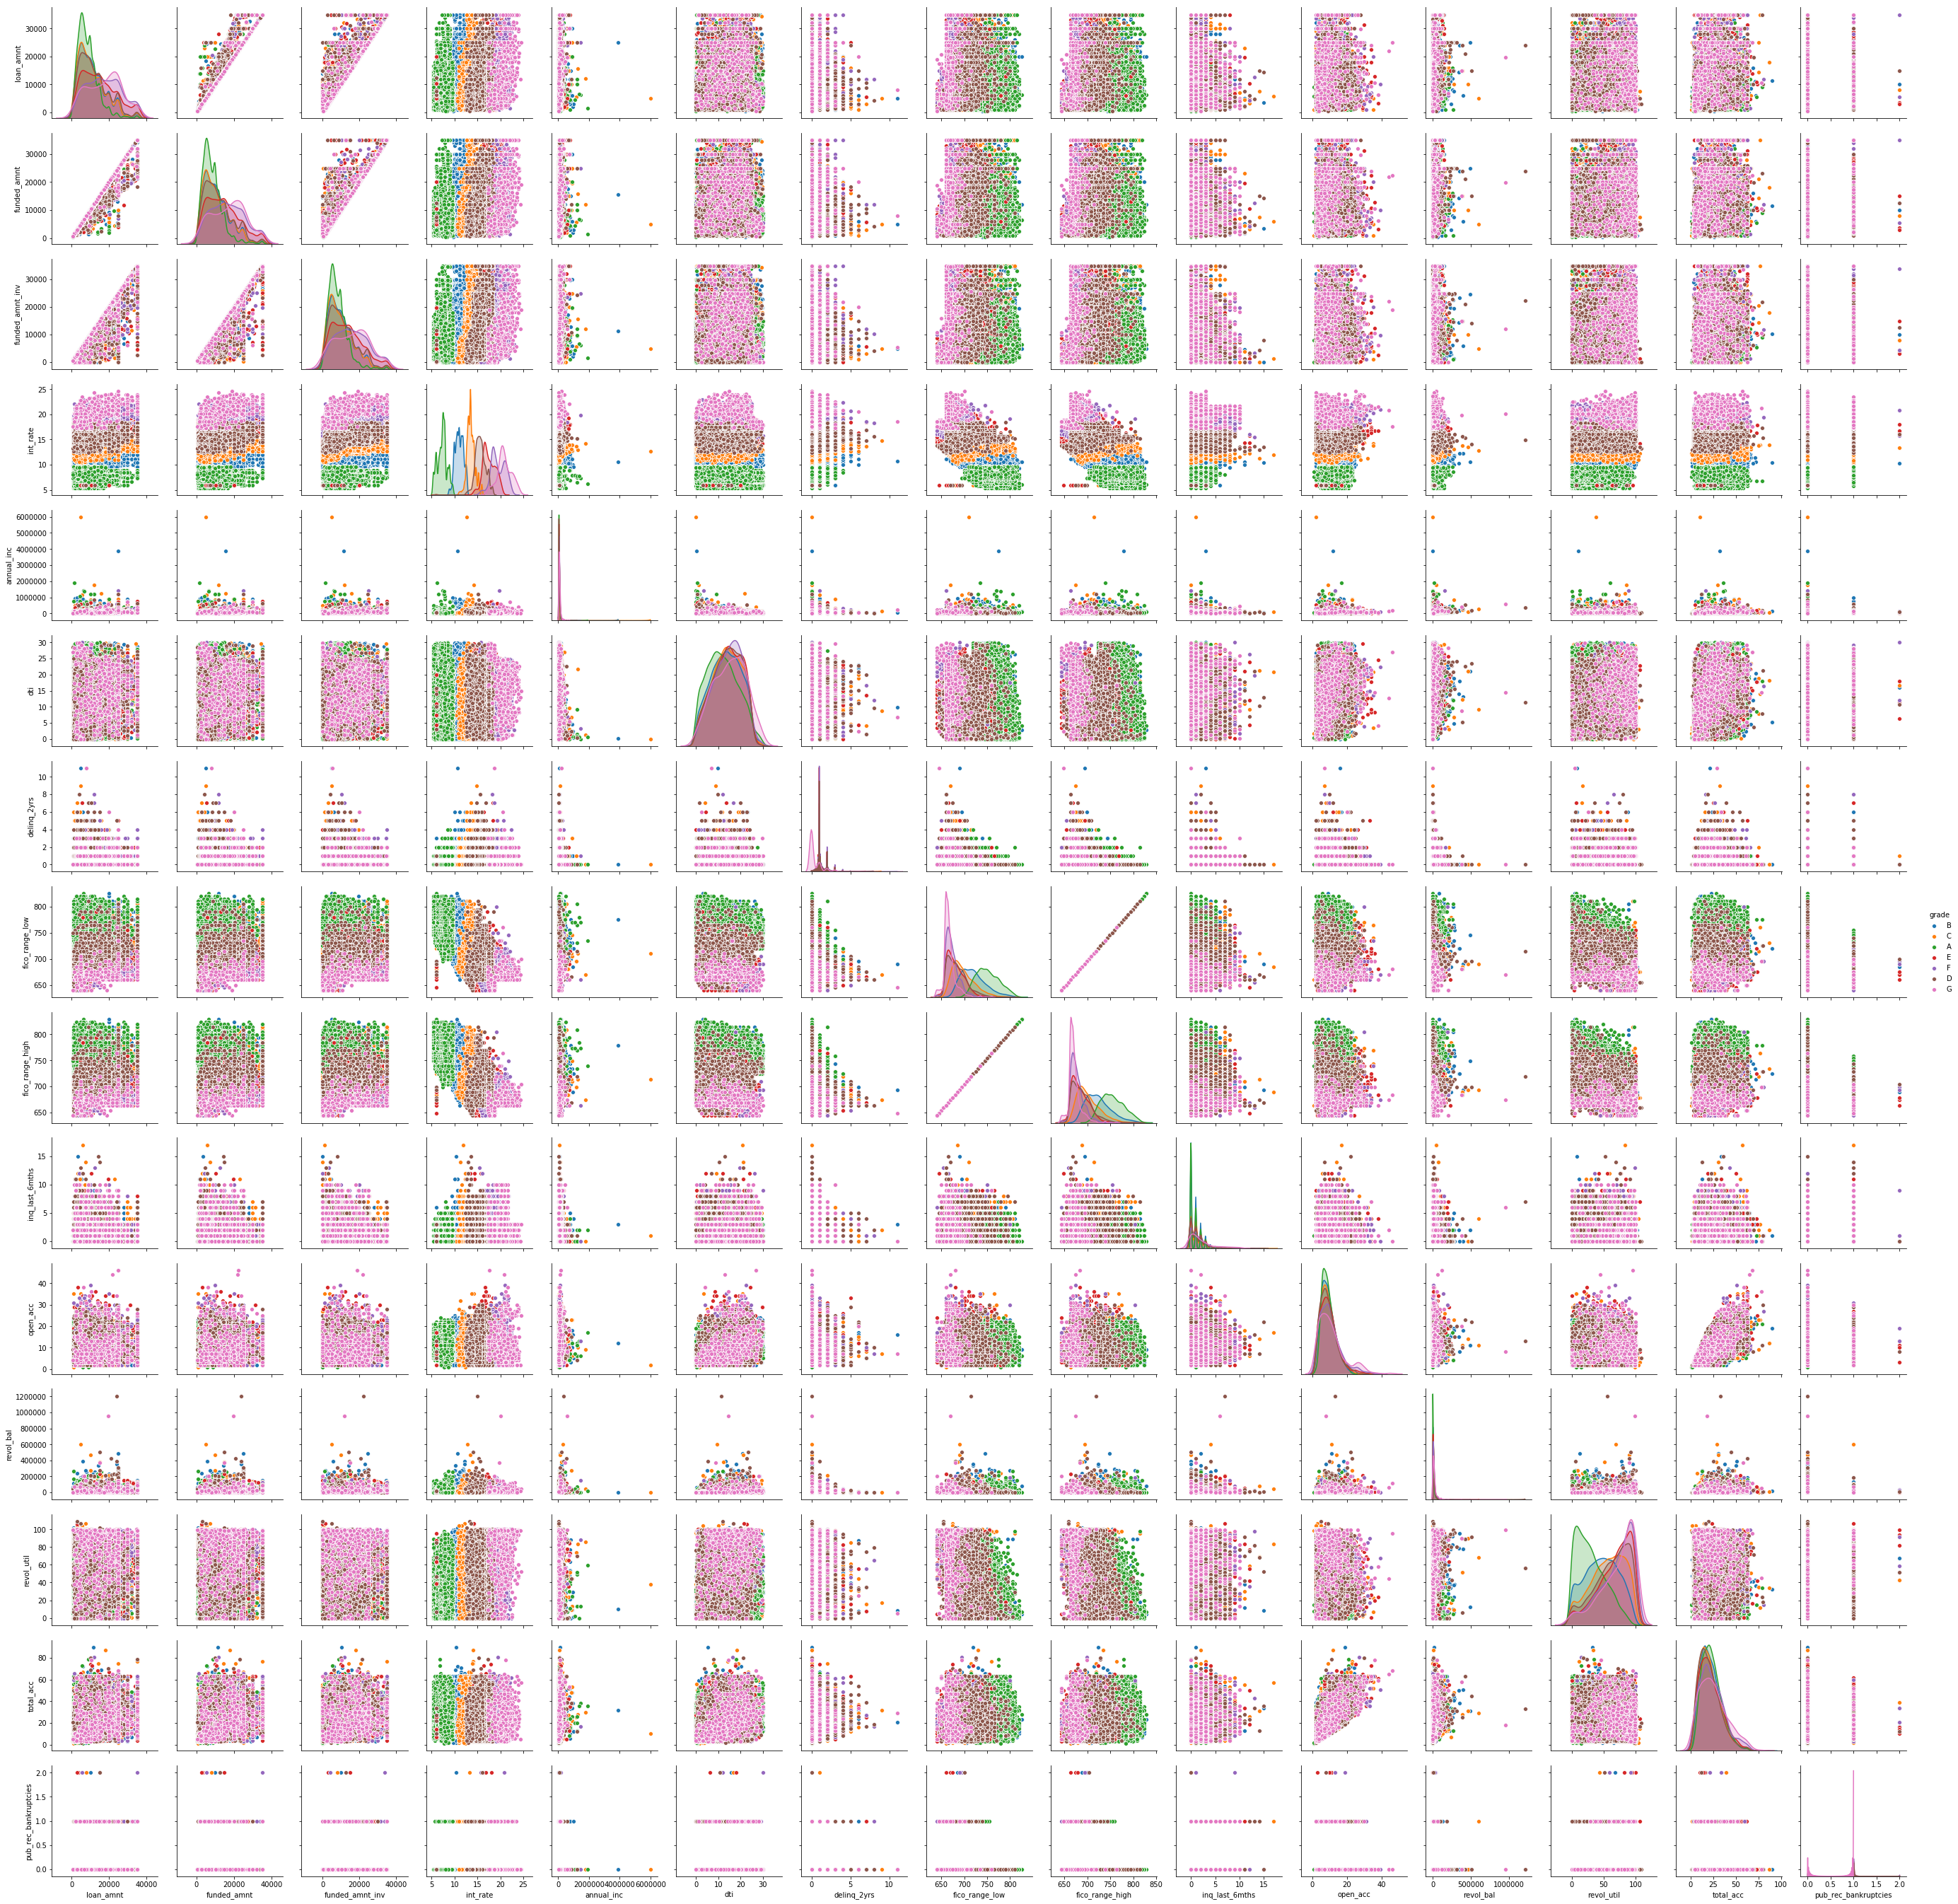

In [548]:
sns.pairplot(accepted2007, hue="grade")

### Loans issued by LoanClub

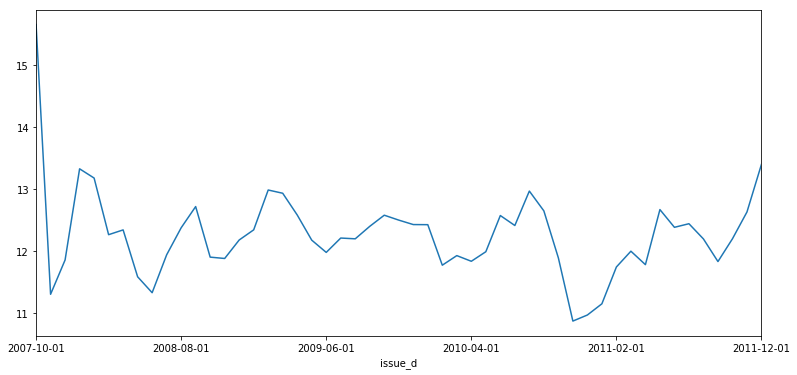

In [58]:
plt.figure(figsize=(13, 6))
accepted2007.groupby("issue_d").mean()["int_rate"].plot()

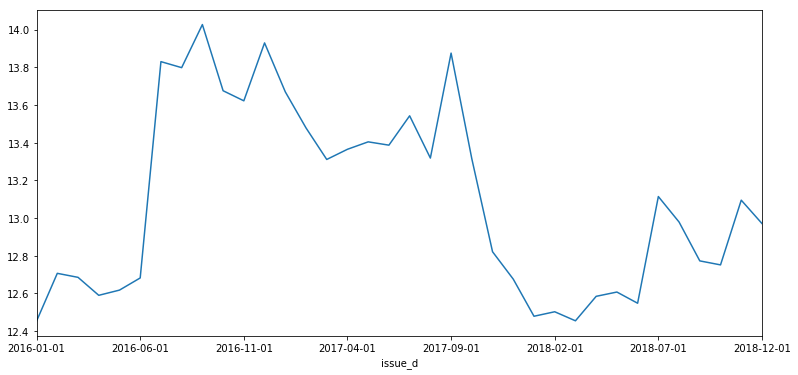

In [59]:
plt.figure(figsize=(13, 6))
accepted2016.groupby("issue_d").mean()["int_rate"].plot()

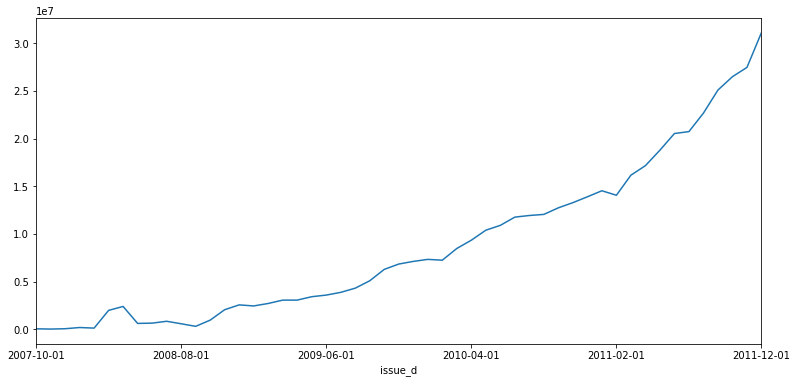

In [60]:
plt.figure(figsize=(13, 6))
accepted2007.groupby("issue_d").sum()["loan_amnt"].plot()

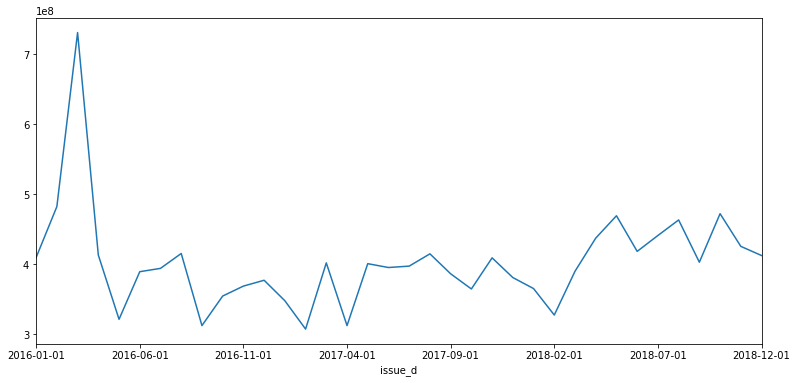

In [61]:
plt.figure(figsize=(13, 6))
accepted2016.groupby("issue_d").sum()["loan_amnt"].plot()

#### 1. Loans by purpose

In [14]:
verified_grade2007 = pd.crosstab(index=accepted2007["grade"], 
                          columns=accepted2007["purpose"])

In [15]:
verified_grade2016 = pd.crosstab(index=accepted2016["grade"], 
                          columns=accepted2016["purpose"])

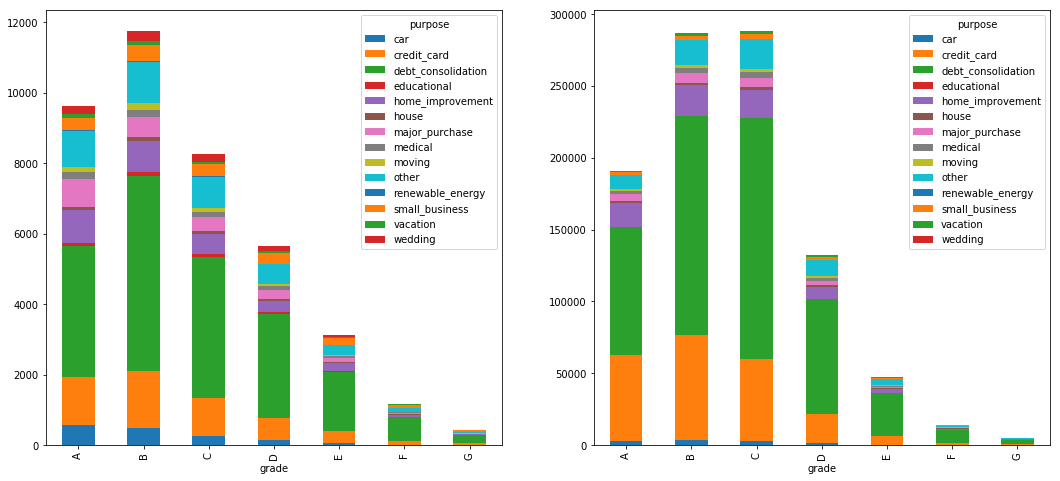

In [122]:
fig = plt.figure(figsize=(18,8))
ax1 = plt.subplot2grid((1,2),(0,0))
verified_grade2007.plot(kind="bar", stacked=True, ax=ax1)
ax1 = plt.subplot2grid((1,2),(0,1))
verified_grade2016.plot(kind="bar", stacked=True, ax=ax1)
plt.show()

Commentary: The most comon purpose is debt consolidation, followed by credit cards (which in a way can also qualify as debt consolidation), and home improvement loans throughout both periods. 
It looks like as a proportion less loans are being asked for weddings and educational purposes. 
These results are inline with the fact americans have:
* an average credit card debt of 6,184 dollars
* mortgage debt of 201,811 dollars. 

As well as that:
* 44% tap into saving to pay of debts/bills
* 26.4% do it for house repairs

Commentary: The most comon purpose stayed the same in this period. But it looks like less loans are being asked for weddings  

#### 3. Loans by grade

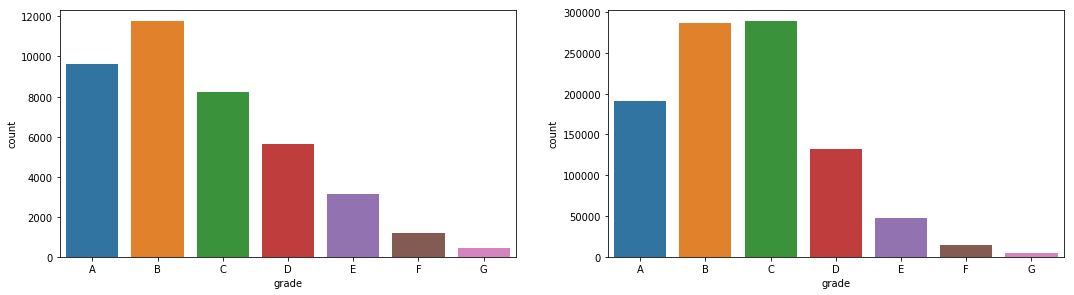

In [121]:
fig = plt.figure(figsize=(18,10))
ax1 = plt.subplot2grid((2,2),(0,0))
sns.countplot(x = "grade", order = ["A", "B", "C", "D", "E", "F", "G"], data=accepted2007)
ax1 = plt.subplot2grid((2,2),(0,1))
sns.countplot(x = "grade", order = ["A", "B", "C", "D", "E", "F", "G"], data=accepted2016)
plt.show()

Commentary: As expected more loans get issued for the higher (safer) loan grade and decreses a lot for more risky ones

#### 4. Loands by term

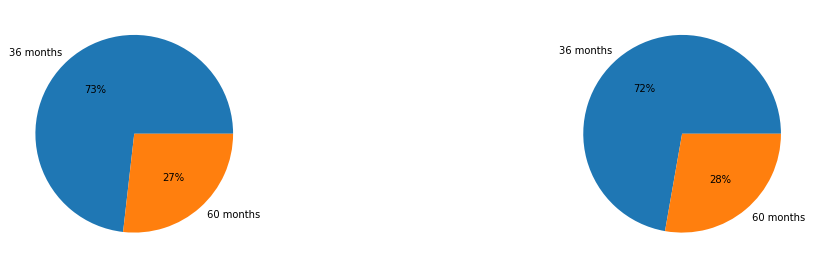

In [120]:
fig = plt.figure(figsize=(18,10))
ax1 = plt.subplot2grid((2,2),(0,0))
plt.pie(accepted2007["term"].value_counts(), labels = ["36 months", "60 months"], autopct='%1.0f%%')
ax1 = plt.subplot2grid((2,2),(0,1))
plt.pie(accepted2016["term"].value_counts(), labels = ["36 months", "60 months"], autopct='%1.0f%%')
plt.show()

Structure of the length of loans stayed similar when compared to 2007-2011 a little over 1/4 of loans being 60 months while 3/4 36 months

#### 5. Loans by home ownership

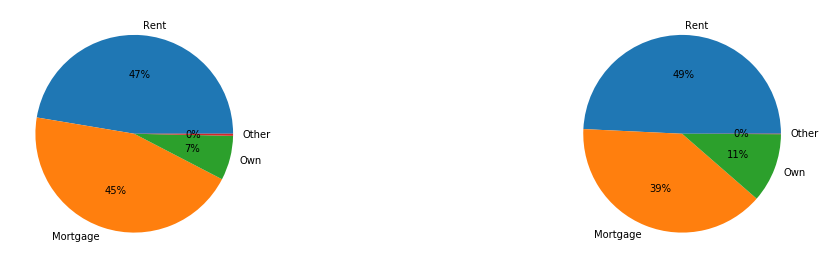

In [71]:
fig = plt.figure(figsize=(18,10))
ax1 = plt.subplot2grid((2,2),(0,0))
plt.pie(accepted2007["home_ownership"].value_counts(), labels = ["Rent", "Mortgage", "Own", "Other"], autopct='%1.0f%%')
ax1 = plt.subplot2grid((2,2),(0,1))
plt.pie(accepted2016["home_ownership"].value_counts(), labels = ["Rent", "Mortgage", "Own", "Other"], autopct='%1.0f%%')
plt.show()

Home ownership changed a little with more people asking for loans who owned a house  (7% vs 11%) as compare to the ones that had mortgage (45% vs 39%)

#### 6. Loans by employment length

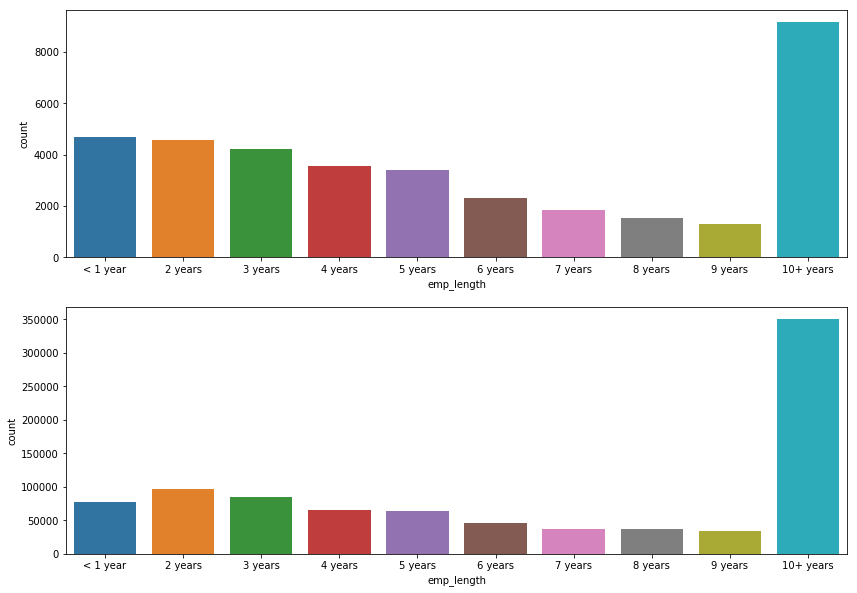

In [119]:
fig = plt.figure(figsize=(14,10))
ax1 = plt.subplot2grid((2,1),(0,0))
sns.countplot(x="emp_length", order = ["< 1 year", "2 years", "3 years", "4 years", "5 years", "6 years",
                                       "7 years", "8 years", "9 years", "10+ years"], data=accepted2007)
ax1 = plt.subplot2grid((2,1),(1,0))
sns.countplot(x="emp_length", order = ["< 1 year", "2 years", "3 years", "4 years", "5 years", "6 years",
                                       "7 years", "8 years", "9 years", "10+ years"], data=accepted2016)
plt.show()

Most of the people asking for loans have been employed for more than 10 years

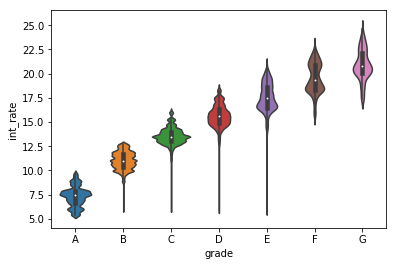

In [144]:
sns.violinplot(x="grade", y="int_rate", order = ["A", "B", "C", "D", "E", "F", "G"], data=accepted2007)

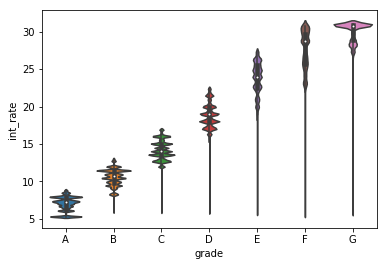

In [146]:
sns.violinplot(x="grade", y="int_rate", order = ["A", "B", "C", "D", "E", "F", "G"], data=accepted2016)

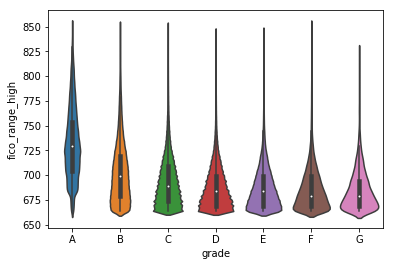

In [139]:
sns.violinplot(x="grade", y="fico_range_high", order = ["A", "B", "C", "D", "E", "F", "G"], data=accepted2016)

#### 7. Correlation matrix

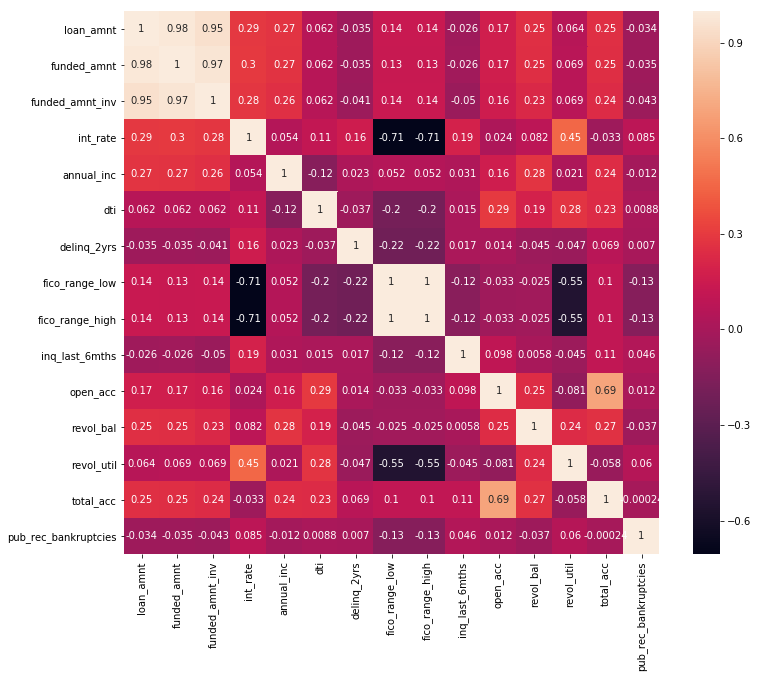

In [124]:
plt.figure(figsize=(12,10))
sns.heatmap(accepted2007.corr(), annot = True)
plt.show()

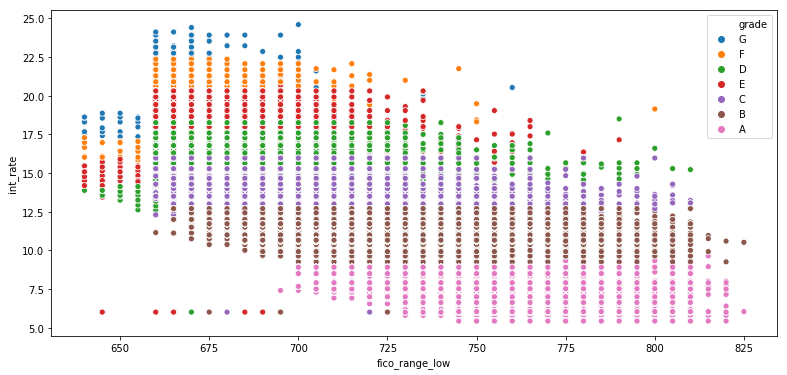

In [132]:
plt.figure(figsize=(13, 6))
sns.scatterplot(x="fico_range_low", y="int_rate", hue="grade", data=accepted2007)
plt.show()

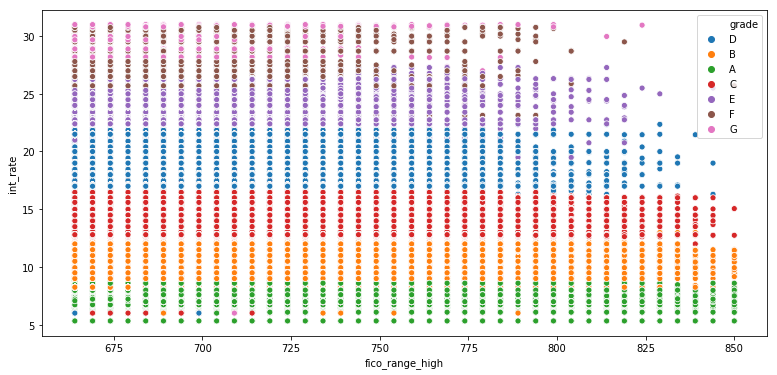

In [126]:
plt.figure(figsize=(13, 6))
sns.scatterplot(x="fico_range_high", y="int_rate", hue="grade", estimator="mean", data=accepted2016)
plt.show()

fico score seems to have lower effect on loan grade compared to the 2007-2011 where relationship appeared to be much stronger. Higher fico score means better credit rating

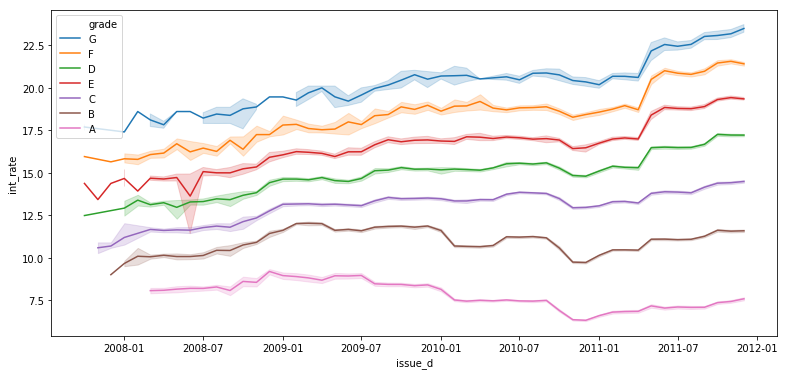

In [127]:
plt.figure(figsize=(13, 6))
sns.lineplot(x="issue_d", y="int_rate", hue = "grade", data = accepted2007)
#plt.xticks(rotation=90)
plt.show()

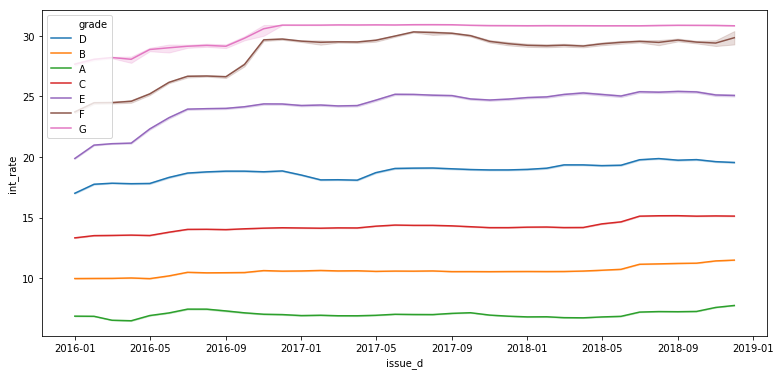

In [128]:
plt.figure(figsize=(13, 6))
sns.lineplot(x="issue_d", y="int_rate", hue = "grade", data = accepted2016)
#plt.xticks(rotation=90)
plt.show()

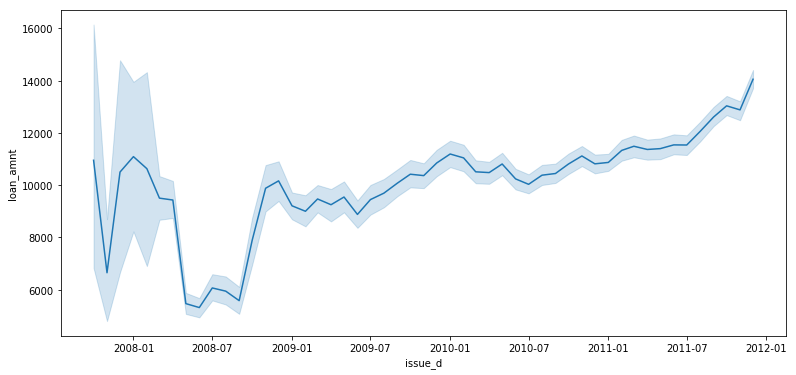

In [129]:
plt.figure(figsize=(13, 6))
sns.lineplot(x="issue_d", y="loan_amnt", estimator = "mean", data = accepted2007)
#plt.xticks(rotation=90)
plt.show()

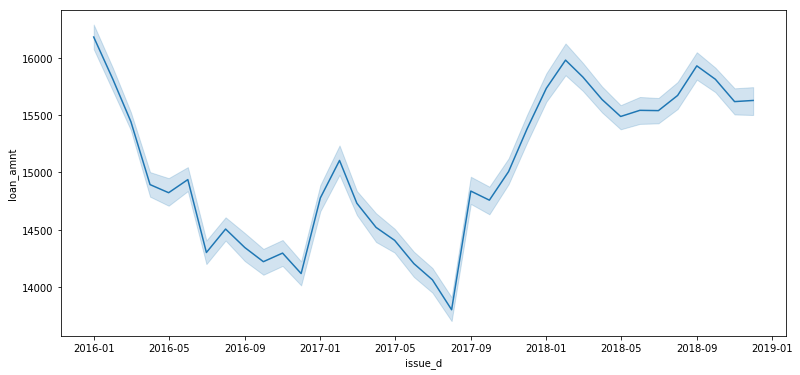

In [130]:
plt.figure(figsize=(13, 6))
sns.lineplot(x="issue_d", y="loan_amnt", estimator = "mean", data = accepted2016)
#plt.xticks(rotation=90)
plt.show()

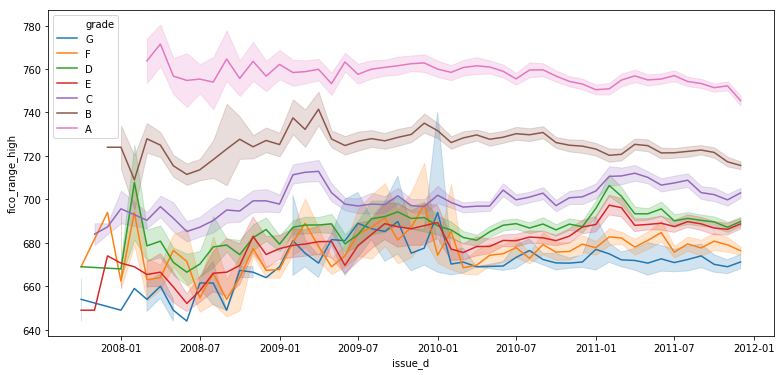

In [140]:
plt.figure(figsize=(13, 6))
sns.lineplot(x="issue_d", y="fico_range_high", hue = "grade", estimator = "mean", data = accepted2007)
#plt.xticks(rotation=90)
plt.show()

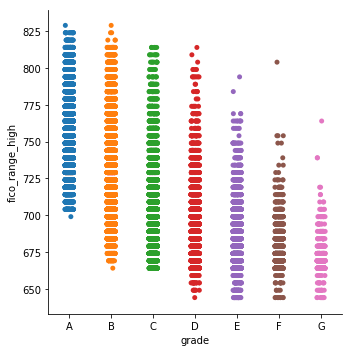

In [141]:
sns.catplot(x="grade", y="fico_range_high", order = ["A", "B", "C", "D", "E", "F", "G"], data=accepted2007)
plt.show()

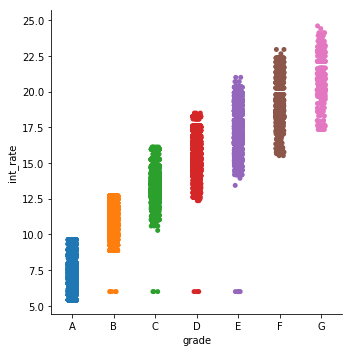

In [142]:
sns.catplot(x="grade", y="int_rate", order = ["A", "B", "C", "D", "E", "F", "G"], data=accepted2007)
plt.show()

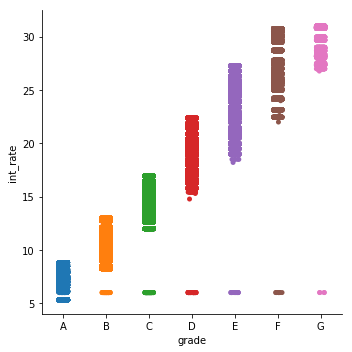

In [47]:
sns.catplot(x="grade", y="int_rate", order = ["A", "B", "C", "D", "E", "F", "G"], data=accepted2016)
plt.show()

The Loan Grade and interest rate have a strong relationship. As the loans that are percieved as safer get the better conditions

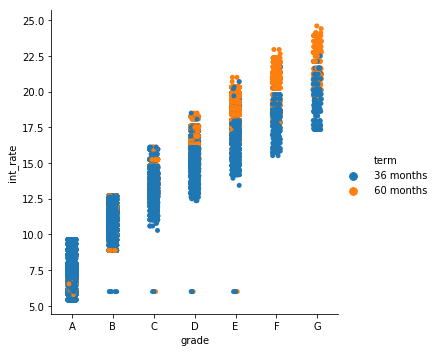

In [40]:
sns.catplot(x="grade", y="int_rate", hue = "term", order = ["A", "B", "C", "D", "E", "F", "G"], data=accepted2007)
plt.show()

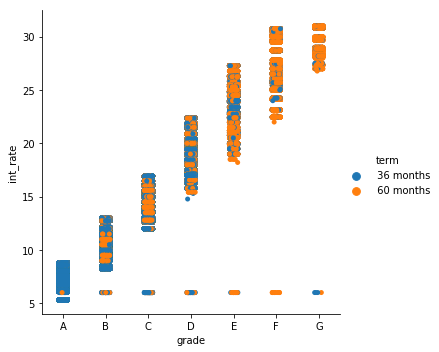

In [41]:
sns.catplot(x="grade", y="int_rate", hue = "term", order = ["A", "B", "C", "D", "E", "F", "G"], data=accepted2016)
plt.show()

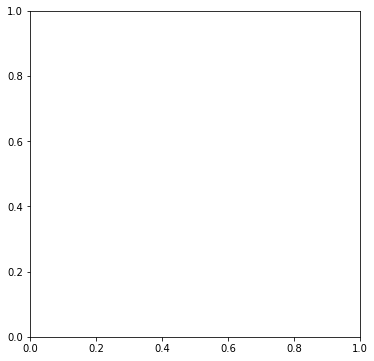

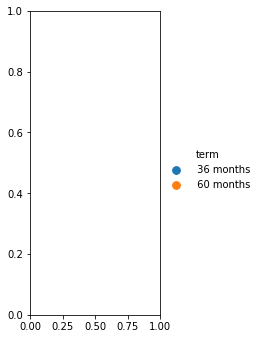

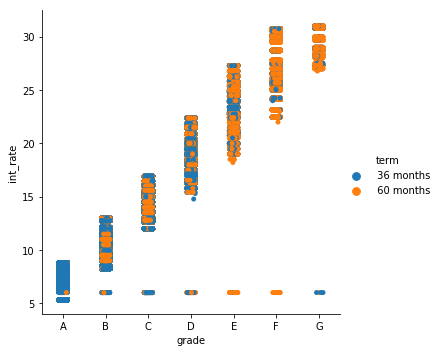

In [152]:
plt.figure(figsize=(13, 6))
ax1 = plt.subplot2grid((1,2),(0,0))
sns.catplot(x="grade", y="int_rate", hue = "term", order = ["A", "B", "C", "D", "E", "F", "G"], 
            data=accepted2007)
ax1 = plt.subplot2grid((1,2),(0,1))
sns.catplot(x="grade", y="int_rate", hue = "term", order = ["A", "B", "C", "D", "E", "F", "G"], 
            data=accepted2016)